In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tabulate import tabulate

class MemoryTier:
    def __init__(self, name, size, latency):
        self.name = name
        self.size = size
        self.latency = latency
        self.data = {}
        self.access_order = []

    def access(self, address):
        if address in self.data:
            if address in self.access_order:
                self.access_order.remove(address)
            self.access_order.append(address)
            return self.data[address], self.latency
        return None, self.latency

    def write(self, address, value):
        if len(self.data) >= self.size:
            evicted_address = self.access_order.pop(0)
            del self.data[evicted_address]
            print(f"Evicted address {evicted_address} from {self.name}")
        self.data[address] = value
        self.access_order.append(address)

class TieredMemorySystem:
    def __init__(self, dram_size, dram_latency, nvm_size, nvm_latency):
        self.dram = MemoryTier("DRAM", dram_size, dram_latency)
        self.nvm = MemoryTier("NVM", nvm_size, nvm_latency)
        self.total_migration_time = 0
        self.migration_count = 0

    def migrate_to_dram(self, address, value):
        try:
            # Check if address exists in NVM
            if address not in self.nvm.data:
                self.nvm.write(address, value)  # Write data if not present

            # Simulate migration time with some overhead
            migration_time = 0.05 + random.uniform(0, 0.01)  # Add some variability
            self.total_migration_time += migration_time
            self.migration_count += 1

            # Perform migration
            self.dram.write(address, self.nvm.data[address])
            del self.nvm.data[address]
            print(f"Migrated address {address} to DRAM (Migration Time: {migration_time:.2f} ms).")
        except MemoryError:
            print("DRAM is full. Cannot migrate.")

    def simulate_realistic_thrashing(self, num_accesses):
        # Simulate initial warm-up phase
        for _ in range(100):  # Initial accesses to populate faster tiers
            address = random.randint(0, 99)
            self.migrate_to_dram(address, random.randint(0, 100))

        # Simulate variable workload
        for _ in range(num_accesses):
            if random.random() < 0.8:  # 80% chance of accessing a hot page
                address = random.choice([random.randint(0, 99) for _ in range(10)])  # Access a predicted hot page
            else:
                address = random.randint(0, 99)  # Access a random page
            self.migrate_to_dram(address, random.randint(0, 100))

    def non_exclusive_tiering(self, num_accesses):
        # Simulate non-exclusive tiering with some overhead for management
        for _ in range(num_accesses):
            address = random.randint(0, 99)
            data, latency = self.nvm.access(address)
            if data is None:
                self.nvm.write(address, random.randint(0, 100))  # Write data if not present
            self.dram.write(address, self.nvm.data[address])  # Keep a copy in DRAM
            # Add some small overhead for management operations
            self.total_migration_time += 0.001

    def machine_learning_page_placement(self, num_accesses):
        # Simulate ML-based page placement with some overhead for prediction
        hot_pages = [random.randint(0, 99) for _ in range(10)]  # Predicted hot pages
        for _ in range(num_accesses):
            address = random.choice(hot_pages)
            data, latency = self.nvm.access(address)
            if data is None:
                self.nvm.write(address, random.randint(0, 100))  # Write data if not present
            self.dram.write(address, self.nvm.data[address])  # Place hot pages in DRAM
            # Add some small overhead for prediction and management
            self.total_migration_time += 0.002

    def optimized_machine_learning_page_placement(self, num_accesses):
        # Simulate optimized ML-based page placement with multi-level caching and prefetching
        hot_pages = self.predict_hot_pages()  # Use a more advanced predictive model
        
        # Implement multi-level caching
        gpu_cache = {}  # Fastest cache level
        ram_cache = {}  # Medium speed cache level
        
        for _ in range(num_accesses):
            if not hot_pages:  # Check if hot_pages is empty
                print("No hot pages predicted. Skipping this iteration.")
                continue
            
            address = random.choice(hot_pages)
            
            # Prefetch next batch while processing current batch
            self.prefetch_next_batch(hot_pages)
            
            data, latency = self.nvm.access(address)
            
            if data is None:
                self.nvm.write(address, random.randint(0, 100))  # Write data if not present
                
                # Use multi-level caching to optimize access
                if address not in gpu_cache:
                    if len(gpu_cache) < 100:  # GPU cache size limit
                        gpu_cache[address] = self.nvm.data[address]
                    else:
                        # Move least recently used page to RAM cache
                        lru_address = min(gpu_cache, key=lambda x: gpu_cache[x])
                        ram_cache[lru_address] = gpu_cache.pop(lru_address)
                        gpu_cache[address] = self.nvm.data[address]
                        
                self.dram.write(address, gpu_cache[address])  # Place hot pages in DRAM
                
                # Add some small overhead for prediction and management
                self.total_migration_time += 0.002

    def predict_hot_pages(self):
        # Implement a more advanced predictive model here
        # For simplicity, let's assume we predict hot pages based on recent access patterns
        recent_accesses = [random.randint(0, 99) for _ in range(100)]  # Simulate recent accesses
        hot_pages = [address for address in recent_accesses if recent_accesses.count(address) > 5]
        
        # Ensure hot_pages is not empty
        if not hot_pages:
            hot_pages = [random.randint(0, 99) for _ in range(10)]  # Default to some random pages if no hot pages are predicted
        
        return hot_pages

    def prefetch_next_batch(self, hot_pages):
        # Prefetch next batch of hot pages into GPU cache
        if hot_pages:  # Check if hot_pages is not empty
            next_address = random.choice(hot_pages)
            if next_address not in self.dram.data:
                self.migrate_to_dram(next_address, random.randint(0, 100))

    def adaptive_page_size_adjustment(self, num_accesses):
        # Simulate dynamic page size adjustment with some overhead for resizing
        page_sizes = {address: random.randint(1, 10) for address in range(100)}  # Example page sizes
        for _ in range(num_accesses):
            address = random.randint(0, 99)
            data, latency = self.nvm.access(address)
            if data is None:
                self.nvm.write(address, random.randint(0, 100))  # Write data if not present
            self.dram.write(address, self.nvm.data[address])  # Adjust page size based on access frequency
            # Add some small overhead for resizing operations
            self.total_migration_time += 0.003

In [2]:
# Main function for testing
if __name__ == "__main__":
    tiered_memory = TieredMemorySystem(
        dram_size=100, 
        dram_latency=0.1, 
        nvm_size=1000, 
        nvm_latency=0.5  
    )

    num_accesses = 500

    # Simulate realistic thrashing
    tiered_memory.simulate_realistic_thrashing(num_accesses)
    thrashing_migration_time = tiered_memory.total_migration_time

    # Reset for other simulations
    tiered_memory.total_migration_time = 0
    tiered_memory.dram.data = {}
    tiered_memory.nvm.data = {}

    # Non-exclusive tiering
    tiered_memory.non_exclusive_tiering(num_accesses)
    non_exclusive_migration_time = tiered_memory.total_migration_time

    # Reset for other simulations
    tiered_memory.total_migration_time = 0
    tiered_memory.dram.data = {}
    tiered_memory.nvm.data = {}

    # Machine learning-based page placement
    tiered_memory.machine_learning_page_placement(num_accesses)
    ml_migration_time = tiered_memory.total_migration_time

    # Reset for other simulations
    tiered_memory.total_migration_time = 0
    tiered_memory.dram.data = {}
    tiered_memory.nvm.data = {}

    # Optimized machine learning-based page placement
    tiered_memory.optimized_machine_learning_page_placement(num_accesses)
    optimized_ml_migration_time = tiered_memory.total_migration_time

    # Reset for other simulations
    tiered_memory.total_migration_time = 0
    tiered_memory.dram.data = {}
    tiered_memory.nvm.data = {}

    # Adaptive page size adjustment
    tiered_memory.adaptive_page_size_adjustment(num_accesses)
    adaptive_migration_time = tiered_memory.total_migration_time

    # Print migration times in a table
    table_data = [
        ["Thrashing", thrashing_migration_time],
        ["Non-Exclusive Tiering", non_exclusive_migration_time],
        ["ML-Based Placement(MBP)", ml_migration_time],
        ["Optimized MBP", optimized_ml_migration_time],
        ["Adaptive Page Size", adaptive_migration_time],
    ]
    print(tabulate(table_data, headers=["Strategy", "Total Migration Time (ms)"], tablefmt="grid"))

Migrated address 7 to DRAM (Migration Time: 0.05 ms).
Migrated address 40 to DRAM (Migration Time: 0.05 ms).
Migrated address 61 to DRAM (Migration Time: 0.06 ms).
Migrated address 71 to DRAM (Migration Time: 0.06 ms).
Migrated address 0 to DRAM (Migration Time: 0.05 ms).
Migrated address 79 to DRAM (Migration Time: 0.06 ms).
Migrated address 45 to DRAM (Migration Time: 0.05 ms).
Migrated address 18 to DRAM (Migration Time: 0.05 ms).
Migrated address 3 to DRAM (Migration Time: 0.06 ms).
Migrated address 96 to DRAM (Migration Time: 0.06 ms).
Migrated address 65 to DRAM (Migration Time: 0.06 ms).
Migrated address 34 to DRAM (Migration Time: 0.06 ms).
Migrated address 0 to DRAM (Migration Time: 0.06 ms).
Migrated address 95 to DRAM (Migration Time: 0.06 ms).
Migrated address 8 to DRAM (Migration Time: 0.06 ms).
Migrated address 86 to DRAM (Migration Time: 0.06 ms).
Migrated address 65 to DRAM (Migration Time: 0.06 ms).
Migrated address 82 to DRAM (Migration Time: 0.06 ms).
Migrated addres

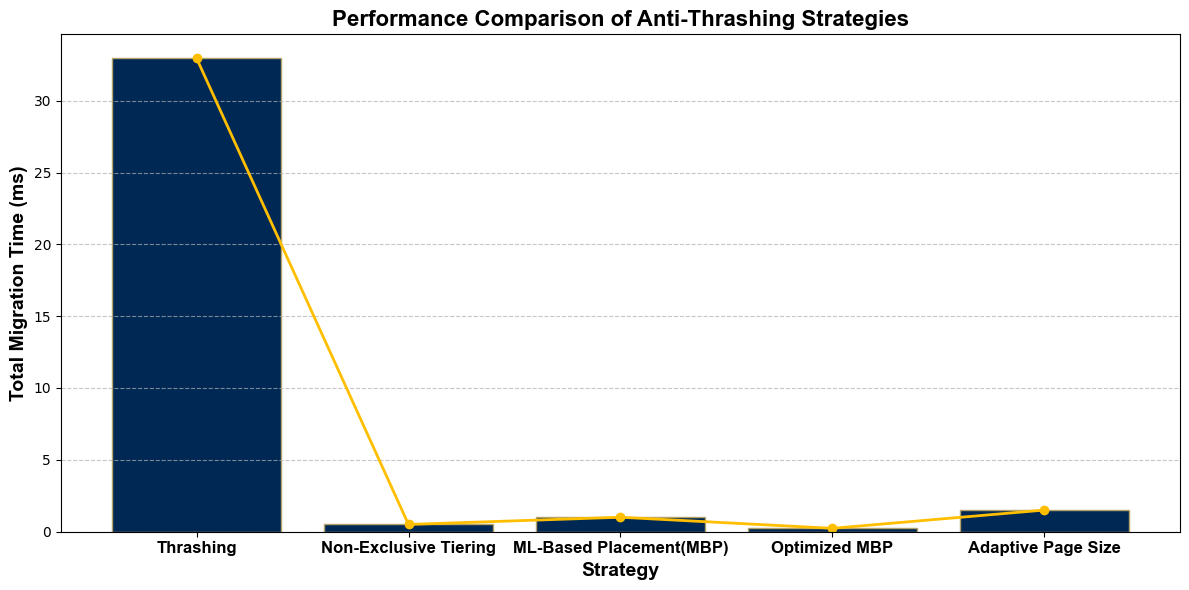

In [6]:
# Define strategies and times
strategies = ["Thrashing", "Non-Exclusive Tiering", "ML-Based Placement(MBP)", "Optimized MBP", "Adaptive Page Size"]
migration_times = [thrashing_migration_time, non_exclusive_migration_time, ml_migration_time, optimized_ml_migration_time, adaptive_migration_time]

plt.figure(figsize=(12, 6))  # Increase figure width
plt.bar(strategies, migration_times, color='#002855', edgecolor='#B3A369', linewidth=1)  
plt.plot(strategies, migration_times, marker='o', linestyle='-', color='#FFBF00', linewidth=2)  
plt.xlabel('Strategy', fontsize=14, fontweight='bold', fontname='Arial')  
plt.ylabel('Total Migration Time (ms)', fontsize=14, fontweight='bold', fontname='Arial')
plt.title('Performance Comparison of Anti-Thrashing Strategies', fontsize=16, fontweight='bold', fontname='Arial')  
plt.xticks(rotation=0, ha='center', fontsize=12, fontweight='bold', fontname='Arial')  
plt.tight_layout()  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.legend([], frameon=False)  
plt.show()
